In [1]:
# import librarties
import numpy as np
import pandas as pd 
import matplotlib.cm


import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('clean_data.csv')
df1=pd.read_csv('training_set_labels.csv')

In [5]:
df['status_group']=df1['status_group']
df

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,functional,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,1,functional,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,2,functional,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,...,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,3,non functional,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,4,functional,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,59395,functional,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,...,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,59396,functional,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,...,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,59397,functional,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,7,...,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,59398,functional,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


In [11]:
df['status_color']=df['status_group'].replace('functional','green').replace('non functional','red').replace('functional needs repair', 'yellow')

In [12]:
df

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat,status_color
0,0,functional,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others,green
1,1,functional,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,...,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others,green
2,2,functional,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,...,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others,green
3,3,non functional,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef,red
4,4,functional,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,...,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,59395,functional,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,...,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi,green
59396,59396,functional,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,...,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others,green
59397,59397,functional,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,7,...,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown,green
59398,59398,functional,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,...,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others,green


In [ ]:
m=folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()], tiles='Stamen Terrain',zoom_start=5.5)
# m

In [13]:
for index, row in df.iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                    radius=15, color=row['status_color']).add_to(m)

In [ ]:
# m

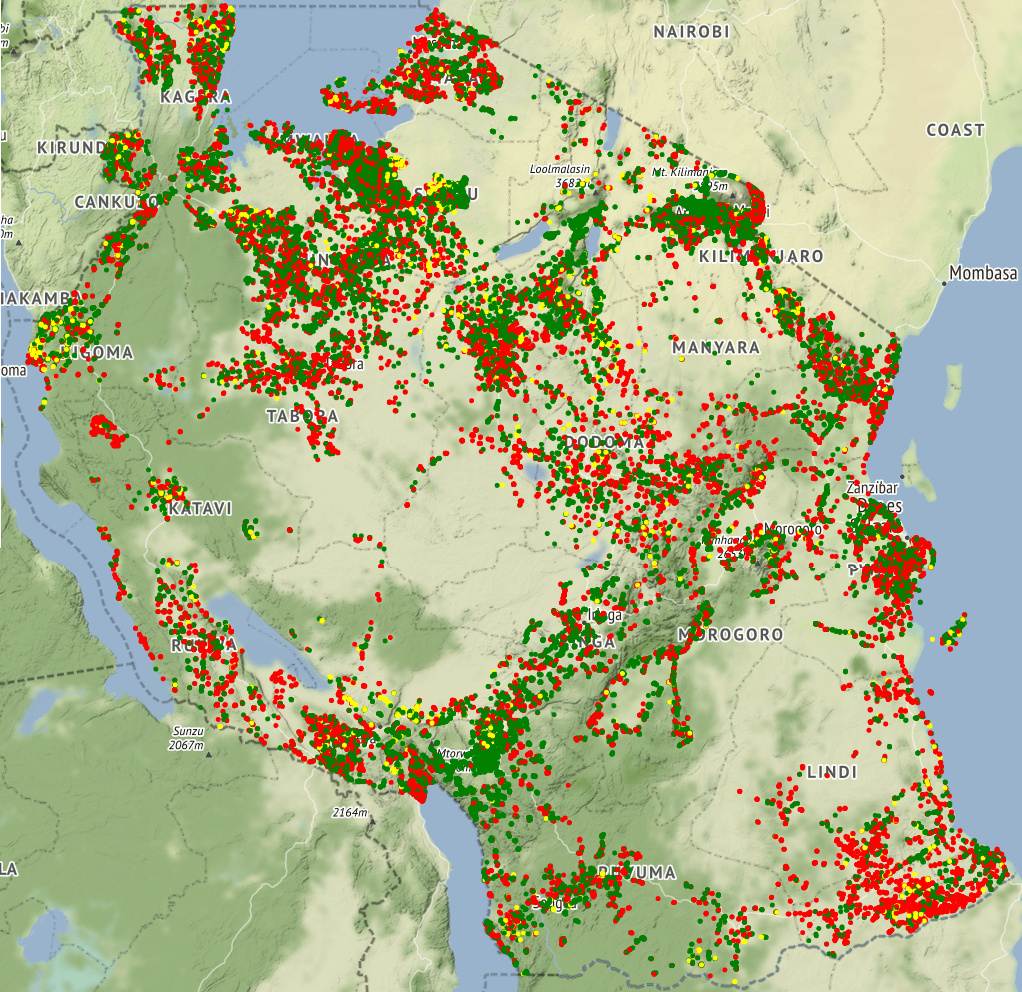

In [19]:
df_yellow=df.where(df['status_color']=='yellow')
df_yellow.dropna(inplace=True)
df_yellow

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat,status_color
18,18.0,functional needs repair,Hesawa,1162.0,DWE,32.920154,-1.947868,Lake Victoria,Mwanza,1.0,...,vwc,never pay,milky,insufficient,spring,other,90s,DWE,Hesawa,yellow
22,22.0,functional needs repair,Unicef,1510.0,DWE,34.586901,-8.980014,Rufiji,Iringa,4.0,...,wua,never pay,soft,enough,river,communal standpipe,70s,DWE,Unicef,yellow
25,25.0,functional needs repair,Government Of Tanzania,1273.0,DWE,37.422751,-3.317536,Pangani,Kilimanjaro,4.0,...,vwc,unknown,soft,enough,spring,communal standpipe,70s,DWE,Government Of Tanzania,yellow
32,32.0,functional needs repair,Government Of Tanzania,1481.0,DWE,37.492334,-3.290627,Pangani,Kilimanjaro,4.0,...,other,never pay,soft,insufficient,river,other,70s,DWE,Government Of Tanzania,yellow
44,44.0,functional needs repair,Government Of Tanzania,1007.0,DWE,36.806079,-3.478559,Pangani,Arusha,2.0,...,vwc,pay per bucket,soft,insufficient,spring,communal standpipe,00s,DWE,Government Of Tanzania,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,59322.0,functional needs repair,Unicef,532.0,Unicef,36.985457,-11.467225,Ruvuma / Southern Coast,Ruvuma,1.0,...,vwc,pay annually,soft,enough,machine dbh,hand pump,90s,Others,Unicef,yellow
59328,59328.0,functional needs repair,Tcrs,1497.0,TCRS,34.799452,-4.349604,Internal,Singida,1.0,...,vwc,pay when scheme fails,soft,enough,shallow well,hand pump,90s,TCRS,Tcrs,yellow
59333,59333.0,functional needs repair,Kiuma,706.0,KIUMA,36.961390,-11.305345,Ruvuma / Southern Coast,Ruvuma,1.0,...,vwc,pay per bucket,soft,enough,machine dbh,communal standpipe multiple,10s,Others,Others,yellow
59345,59345.0,functional needs repair,Isf,962.0,DWE,29.729909,-4.801508,Lake Tanganyika,Kigoma,3.0,...,vwc,pay monthly,soft,enough,river,communal standpipe multiple,00s,DWE,Others,yellow


In [22]:
m_needs_repair=folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()], tiles='Stamen Terrain',zoom_start=5.5)

for index, row in df_yellow.iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                    radius=15, color=row['status_color']).add_to(m_needs_repair)

In [24]:
# m_needs_repair

In [25]:
df_red=df.where(df['status_color']=='red')
df_red.dropna(inplace=True)

In [29]:
df_red

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat,status_color
3,3.0,non functional,Unicef,263.0,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63.0,...,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef,red
6,6.0,non functional,Dwsp,0.0,DWSP,33.362410,-3.766365,Internal,Shinyanga,3.0,...,vwc,never pay,soft,enough,machine dbh,hand pump,0,Others,Dwsp,red
7,7.0,non functional,Rwssp,0.0,DWE,32.620617,-4.226198,Lake Tanganyika,Shinyanga,3.0,...,wug,unknown,milky,enough,shallow well,hand pump,0,DWE,Rwssp,red
8,8.0,non functional,Wateraid,0.0,Water Aid,32.711100,-5.146712,Lake Tanganyika,Tabora,6.0,...,vwc,never pay,salty,seasonal,machine dbh,hand pump,0,Others,Others,red
16,16.0,non functional,Unicef,1703.0,DWE,34.642439,-9.106185,Rufiji,Iringa,4.0,...,wua,pay monthly,soft,dry,river,communal standpipe,70s,DWE,Unicef,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59382,59382.0,non functional,Ces(gmbh),1383.0,DWE,37.454759,-3.323599,Pangani,Kilimanjaro,4.0,...,water board,pay per bucket,soft,enough,spring,communal standpipe,00s,DWE,Others,red
59384,59384.0,non functional,Concern,0.0,CONCERN,30.667805,-2.483710,Lake Victoria,Kagera,30.0,...,vwc,never pay,soft,insufficient,spring,communal standpipe,0,Others,Others,red
59391,59391.0,non functional,Government Of Tanzania,540.0,Government,38.044070,-4.272218,Pangani,Kilimanjaro,3.0,...,vwc,never pay,soft,enough,river,communal standpipe,60s,Government,Government Of Tanzania,red
59392,59392.0,non functional,Government Of Tanzania,0.0,Government,33.009440,-8.520888,Lake Rukwa,Mbeya,1.0,...,vwc,never pay,soft,enough,spring,communal standpipe,0,Government,Government Of Tanzania,red


In [27]:
m_non_func=folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()], tiles='Stamen Terrain',zoom_start=5.5)

for index, row in df_red.iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                    radius=15, color=row['status_color']).add_to(m_non_func)

In [30]:
# m_non_func

In [43]:
# df.drop(columns='Unnamed: 0',inplace=True)
df.groupby(['status_group','quantity']).count()

funder  gps_height  installer  \
status_group            quantity                                      
functional              dry              157         157        157   
                        enough         21648       21648      21648   
                        insufficient    7916        7916       7916   
                        seasonal        2325        2325       2325   
                        unknown          213         213        213   
functional needs repair dry               37          37         37   
                        enough          2400        2400       2400   
                        insufficient    1450        1450       1450   
                        seasonal         416         416        416   
                        unknown           14          14         14   
non functional          dry             6052        6052       6052   
                        enough          9138        9138       9138   
                        insufficient    5763        5763       5763   
                        seasonal        1309        1309       1309   
                        unknown          562         562        562   

                                      longitude  latitude  basin  region  \
status_group            quantity                                           
functional              dry                 157       157    157     157   
                        enough            21648     21648  21648   21648   
                        insufficient       7916      7916   7916    7916   
                        seasonal           2325      2325   2325    2325   
                        unknown             213       213    213     213   
functional needs repair dry                  37        37     37      37   
                        enough             2400      2400   2400    2400   
                        insufficient       1450      1450   1450    1450   
                        seasonal            416       416    416     416   
                        unknown              14        14     14      14   
non functional          dry                6052      6052   6052    6052   
                        enough             9138      9138   9138    9138   
                        insufficient       5763      5763   5763    5763   
                        seasonal           1309      1309   1309    1309   
                        unknown             562       562    562     562   

                                      district_code    lga   ward  ...  \
status_group            quantity                                   ...   
functional              dry                     157    157    157  ...   
                        enough                21648  21648  21648  ...   
                        insufficient           7916   7916   7916  ...   
                        seasonal               2325   2325   2325  ...   
                        unknown                 213    213    213  ...   
functional needs repair dry                      37     37     37  ...   
                        enough                 2400   2400   2400  ...   
                        insufficient           1450   1450   1450  ...   
                        seasonal                416    416    416  ...   
                        unknown                  14     14     14  ...   
non functional          dry                    6052   6052   6052  ...   
                        enough                 9138   9138   9138  ...   
                        insufficient           5763   5763   5763  ...   
                        seasonal               1309   1309   1309  ...   
                        unknown                 562    562    562  ...   

                                      extraction_type_group  management  \
status_group            quantity                                          
functional              dry                             157         157   
                        enough                       